In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import unet
from unet import utils
from unet.datasets import circles

In [2]:
unet_model = unet.build_model(channels=circles.channels,
                              num_classes=circles.classes,
                              layer_depth=3,
                              filters_root=16)
unet.finalize_model(unet_model)

In [3]:
train_dataset, validation_dataset = circles.load_data(100, nx=200, ny=200, splits=(0.8, 0.2))

In [4]:
trainer = unet.Trainer(checkpoint_callback=False)
trainer.fit(unet_model,
            train_dataset,
            validation_dataset,
            epochs=5,
            batch_size=1)

Train on 80 samples, validate on 20 samples
Epoch 1/5
80/80 [==============================] - 29s 365ms/sample - loss: 0.3138 - categorical_crossentropy: 0.3138 - categorical_accuracy: 0.9514 - mean_io_u: 0.4636 - dice_coefficient: 0.8317 - auc: 0.9447 - val_loss: 0.3525 - val_categorical_crossentropy: 0.3525 - val_categorical_accuracy: 0.9540 - val_mean_io_u: 0.3850 - val_dice_coefficient: 0.7115 - val_auc: 0.9918
Epoch 2/5
80/80 [==============================] - 28s 348ms/sample - loss: 0.1380 - categorical_crossentropy: 0.1380 - categorical_accuracy: 0.9528 - mean_io_u: 0.5944 - dice_coefficient: 0.9285 - auc: 0.9860 - val_loss: 0.1031 - val_categorical_crossentropy: 0.1031 - val_categorical_accuracy: 0.9540 - val_mean_io_u: 0.5948 - val_dice_coefficient: 0.9251 - val_auc: 0.9937
Epoch 3/5
80/80 [==============================] - 29s 366ms/sample - loss: 0.1181 - categorical_crossentropy: 0.1181 - categorical_accuracy: 0.9528 - mean_io_u: 0.5894 - dice_coefficient: 0.9370 - auc: 0

In [5]:
prediction = unet_model.predict(validation_dataset[0])

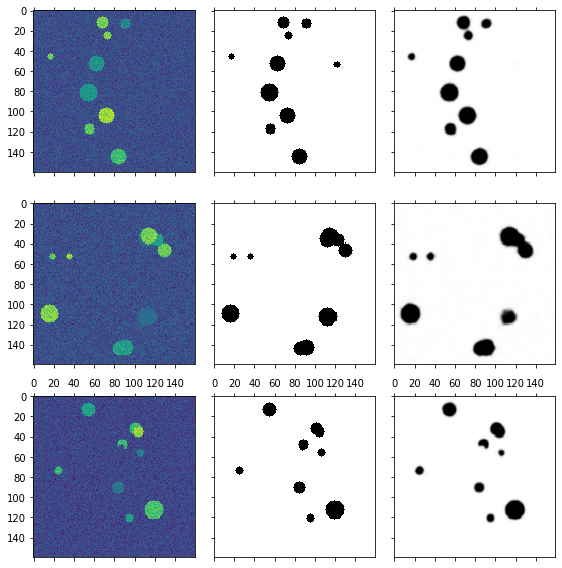

In [6]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8,8))
for i in range(3):
    ax[i][0].matshow(utils.crop_to_shape(validation_dataset[0], prediction.shape)[i,...,0])
    ax[i][1].matshow(utils.crop_to_shape(validation_dataset[1], prediction.shape)[i,...,0], cmap=plt.cm.gray)
    ax[i][2].matshow(prediction[i,...,0], cmap=plt.cm.gray)
plt.tight_layout()

In [9]:
%load_ext tensorboard
%tensorboard --logdir unet/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
